# STAML Final Project



Author: Olivia Daly



Code sources: the code for this file was based off of Tutorials 1-8 from the Introduction to Machine Learning module for the ASDS course and Aurelien Guéron's book "Hands–On Machine Learning with Scikit–Learn and TensorFlow" (2019). Other sources have been cited where used.

Loading necessary packages:

In [1]:
#Necessary packages taken from tutorial and online

# Import necessary packages
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn


# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")


#Regression packages

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit

# Classifiers
import numpy.matlib
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
# Evaluation tools
from sklearn.metrics import plot_confusion_matrix
from sklearn. metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# CV
from sklearn.model_selection import cross_val_score




Loading in preprocessed data:

In [2]:

pollution_energy_data = pd.read_csv('C:/Users/olivi/Documents/Special Topics in Applied Machine Learning/pollution_energy_data_long.csv')


Getting a first look at the preprocessed data:

In [3]:
pollution_energy_data
#unnamed column is the original index from before the preprocessing 
pollution_energy_data.drop(columns = {'Unnamed: 0'})

,"Air pollution (total) (deaths per 100,000)",country,year,renewables_consumption,oil_consumption,nuclear_consumption,coal_consumption
0,66.759231,Algeria,1965,1.111,15.405,0.000,0.814
1,66.759231,Algeria,1966,0.986,20.273,0.000,0.791
2,66.759231,Algeria,1967,1.139,18.942,0.000,0.605
3,66.759231,Algeria,1968,1.564,20.167,0.000,0.640
4,66.759231,Algeria,1969,1.003,21.306,0.000,0.814
...,...,...,...,...,...,...,...
100347,63.822966,World,2015,14849.694,50891.976,6516.074,43844.173
100348,63.822966,World,2016,15663.156,51920.156,6575.951,43195.639
100349,63.822966,World,2017,16563.723,52567.520,6596.391,43359.508
100350,63.822966,World,2018,17541.405,53181.125,6711.461,44109.462


In [4]:
pollution_energy_data['year'].unique()

array([1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype=int64)

In [5]:
pollution_energy_data['country'].unique()

array(['Algeria', 'Argentina', 'Australia', 'Austria', 'Azerbaijan',
       'Bangladesh', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria', 'Canada',
       'Chile', 'China', 'Colombia', 'Croatia', 'Cyprus', 'Denmark',
       'Egypt', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait', 'Latvia',
       'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico', 'Morocco',
       'Netherlands', 'New Zealand', 'North America', 'Norway', 'Oman',
       'Pakistan', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania',
       'Russia', 'Saudi Arabia', 'Singapore', 'Slovakia', 'Slovenia',
       'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 'Sweden',
       'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'Turkmenistan',
       'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Uzbekistan', 'Venezuela', 'Vietnam', 'World'],
      dtype=object)

In [6]:
pollution_energy_data['country'].nunique()
#73 countries + aggregated "World" figures

74

Initial Visualisation:

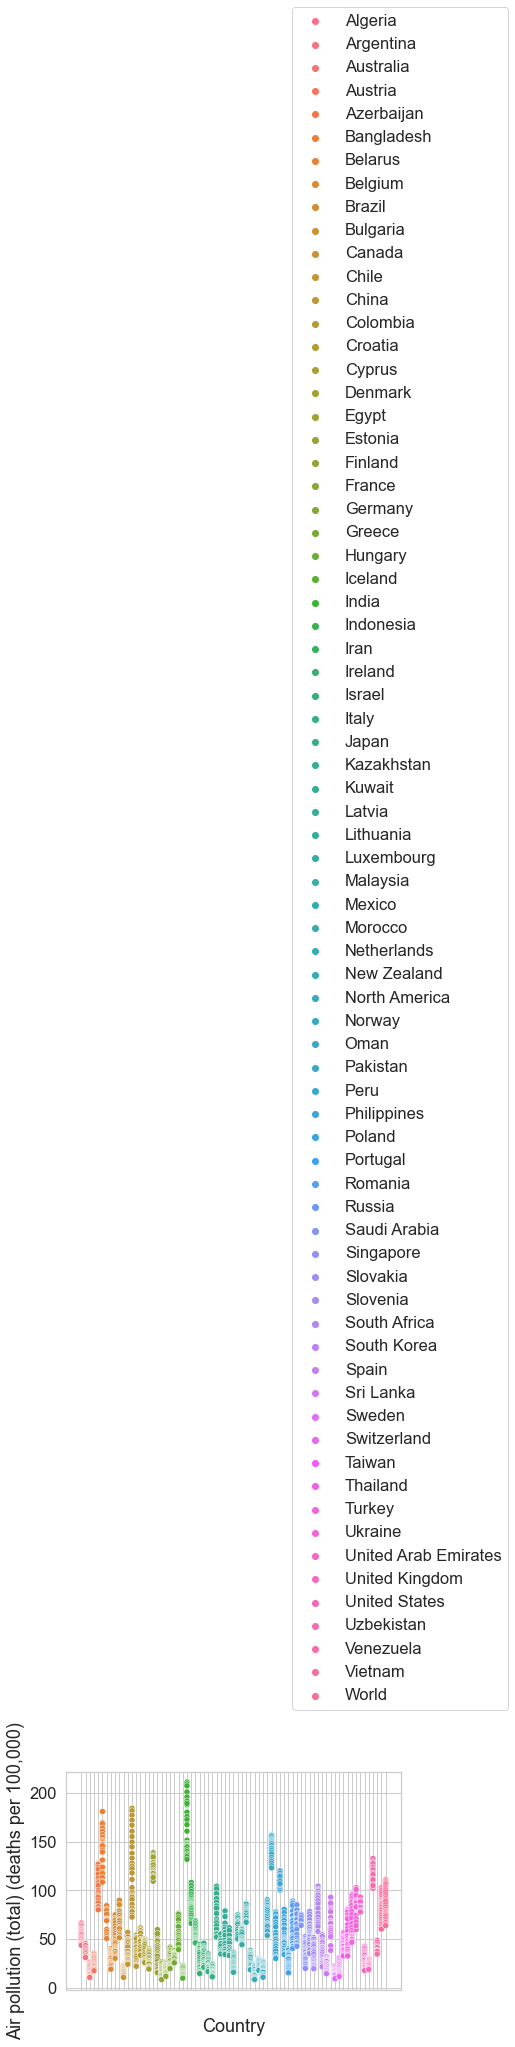

In [7]:
#subsetting for just 1 year of data to make the plot easier to read

data2018 = pollution_energy_data[pollution_energy_data['year'] == 2018]
pollution_death_plot = sns.scatterplot(x="country", y="Air pollution (total) (deaths per 100,000)",
                 hue="country",
                 data=data2018)
plt.xlabel('Country')
plt.ylabel('Air pollution (total) (deaths per 100,000)')
plt.xticks(color='w')
plt.legend(bbox_to_anchor =(0.65, 1.25))

#slightly better but still not great
#There's a lot of info crammed into this graph

### Classification

My initial problem is actually understanding how I'm going to put my proposed approach into practise and how to deal with a categorical variable like countries when classifying

I didn't manage to find too much help on the internet regarding this in the end and decided to work with disaggregated data across countries to get a better understanding of the issues faced in this field regarding doing so, which drives a lot of localised case studies.

Taking a look at the data type within each column:

In [8]:
pollution_energy_data.dtypes

Unnamed: 0                                      int64
Air pollution (total) (deaths per 100,000)    float64
country                                        object
year                                            int64
renewables_consumption                        float64
oil_consumption                               float64
nuclear_consumption                           float64
coal_consumption                              float64
dtype: object

In [9]:
#pollution_energy_data = pollution_energy_data.apply(pd.to_numeric, errors='coerce')
pollution_energy_data.dtypes

Unnamed: 0                                      int64
Air pollution (total) (deaths per 100,000)    float64
country                                        object
year                                            int64
renewables_consumption                        float64
oil_consumption                               float64
nuclear_consumption                           float64
coal_consumption                              float64
dtype: object

## Classification

#### Classification can be used for putting data into groups or 'classes' as part of the research process on a topic like this, as I have demonstrated below.

### First, classifying using full dataset with all 4 energy types as predictors:

#### Labelling the data:

In [10]:

#page on the internet used to help me:
#https://stackoverflow.com/questions/50865987/how-to-select-all-elements-greater-than-a-given-values-in-a-dataframe
#criteria = df[df['b'] >= 60.0]

y = np.array(pollution_energy_data['Air pollution (total) (deaths per 100,000)'] > 60) 
#Binary classification- will get true or false based on the above value
#True = high air pollution, deaths > 60 per 100,000 of population
#False = low air pollution

#Keeping all other columns as features - but taking out the country column because it's a string




X = np.array(pollution_energy_data.drop(['Air pollution (total) (deaths per 100,000)', 'country'], 1).astype(float))




C:\Users\olivi\AppData\Local\Temp/ipykernel_40888/1770888771.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(pollution_energy_data.drop(['Air pollution (total) (deaths per 100,000)', 'country'], 1).astype(float))


In [11]:
y

array([ True,  True,  True, ...,  True,  True,  True])

In [12]:
X

array([[6.7850000e+03, 1.9650000e+03, 1.1110000e+00, 1.5405000e+01,
        0.0000000e+00, 8.1400000e-01],
       [6.7860000e+03, 1.9660000e+03, 9.8600000e-01, 2.0273000e+01,
        0.0000000e+00, 7.9100000e-01],
       [6.7870000e+03, 1.9670000e+03, 1.1390000e+00, 1.8942000e+01,
        0.0000000e+00, 6.0500000e-01],
       ...,
       [4.0182400e+05, 2.0170000e+03, 1.6563723e+04, 5.2567520e+04,
        6.5963910e+03, 4.3359508e+04],
       [4.0182500e+05, 2.0180000e+03, 1.7541405e+04, 5.3181125e+04,
        6.7114610e+03, 4.4109462e+04],
       [4.0182600e+05, 2.0190000e+03, 1.8504151e+04, 5.3619925e+04,
        6.9234120e+03, 4.3849215e+04]])

### Full Dataset - Decision Tree Classifier

#### Trying the classification with different classifiers:

Note- this was running earlier, but unfortunately it won't run for me right now in a timely manner and is taking too long, but I have included a screenshot of my final results in my earlier report.

In [ ]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB()]

for name, clf in zip(names, classifiers):
    print(name)
    #Fitting the classifier to our dataset
    clf.fit(X, y)
    #Predicting new values based on our fitted classifier
    predicted_y = clf.predict(X)

    #How well does it correspond to the 'real' values?
    print("Number of mislabeled points out of a total %d points : %d" % (X.shape[0], (y != predicted_y).sum()))
    
    #print("Number of mislabeled points out of a total %100 points : %d" % 100
    
    

#### Chosen Classifiers:

#### Decision Tree- 
Multiple algorithms are used for splitting decision nodes into sub-nodes. Decision leaves are nodes that don't split into further ones. The decisions are made based on the labels.
Multiple variables used to make a final classification decision.

Sources: 
https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html
https://blog.paperspace.com/decision-trees/
https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/
https://vitalflux.com/differences-between-random-forest-vs-adaboost/

#### AdaBoost- 

Short for adaptive boosting. Boosting algorithms take weak learners and convert them into strong learners. Weak learners are merely a set of classification rules eg whether an email is Spam or not. The Boosting algorithm then does a conversion to a stronger predictor by weighting predictions based on things considered more important or using averages/weighted averages.

Layers of base learning algorithms are used. Originally equal weight is given to all observations in the first iteration, and then in subsequent iterations things that were previously incorrectly predicted are weighted more heavily in subsequent iterations.

Summarised from Source: https://www.analyticsvidhya.com/blog/2015/11/quick-introduction-boosting-algorithms-machine-learning/

#### Differences between the two:

Adaboost- each decision stump only built on one variable/feature, decision trees use multiple features.

source: https://vitalflux.com/differences-between-random-forest-vs-adaboost/

### Full Dataset- Decision Tree Classifier

Number of mislabeled points out of a total 100352 points : 0
Number of mislabeled points in the training set out of a total 80281 points : 0
Number of mislabeled points in the test set out of a total 20071 points : 4
Score:  1.0 0.9998007074884161


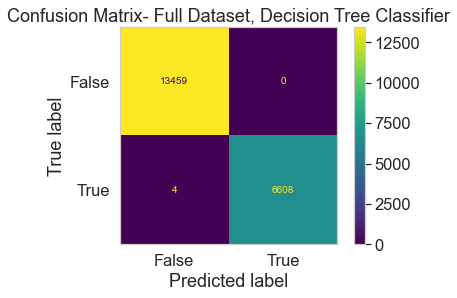

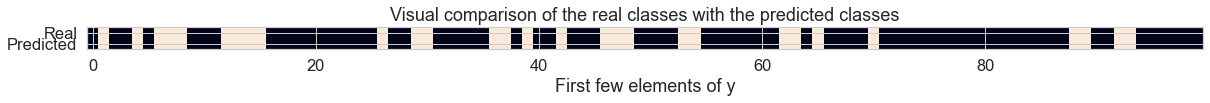

In [12]:
#Defining the classifier
clf = DecisionTreeClassifier()
#Fitting the classifier to our dataset
clf.fit(X, y)
#Predicting new values based on our fitted classifier
predicted_y = clf.predict(X)

#How well does it correspond to the 'real' values?
print("Number of mislabeled points out of a total %d points : %d" % (X.shape[0], (y != predicted_y).sum())) # should have done this later

#Evaluating the performance of the model is done by evaluating the standard of prediction

from sklearn.model_selection import train_test_split

#We split the data into a training and testing part for X and y
#After a randomisation of the dataset! (random_state is used to get always the same randomisation)
#I did a randomised split because when I printed y above I realised that if I didn't randomise it would
#only be training on certain types of fruit eg apples and would be less accurate on the pther kinds 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Fit the classifier to our 'training' dataset: 'weights' of the model are going to be saved in the clf 
clf.fit(X_train, y_train)

#Predict new values based on the train dataset AND the test dataset

predicted_y_train = clf.predict(X_train)
predicted_y_test = clf.predict(X_test)

# Count the number of misclassifications in training and test sets
print("Number of mislabeled points in the training set out of a total %d points : %d" % (X_train.shape[0], (y_train != predicted_y_train).sum()))
print("Number of mislabeled points in the test set out of a total %d points : %d" % (X_test.shape[0], (y_test != predicted_y_test).sum()))

# Calculate classification accuracy
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('Score: ', train_score, test_score)

#Calculate and plot confusion matrix (see tutorial 4)


plot_confusion_matrix(clf, X_test, y_test) 
plt.grid(False)
plt.title('Confusion Matrix- Full Dataset, Decision Tree Classifier')
plt.show()

#Visualisation of Real VS Predicted classes
plt.figure(figsize=(20, 3))
plt.imshow([y_test[:100], predicted_y_test[:100]]) 
plt.xlabel('First few elements of y')
plt.yticks([0,1], ['Real', 'Predicted'])
plt.title('Visual comparison of the real classes with the predicted classes')
plt.show()
#1 color for false, another for true


#True = high air pollution
#False = low air pollution

#### More precise classification accuracy report:

In [13]:
#Evaluating classification scores:
predictions = clf.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     13459
        True       1.00      1.00      1.00      6612

    accuracy                           1.00     20071
   macro avg       1.00      1.00      1.00     20071
weighted avg       1.00      1.00      1.00     20071



In [14]:
#Cross Validated accuracy metric

#https://scikit-learn.org/stable/modules/cross_validation.html

CV_scores = cross_val_score(clf, X, y, cv=5)
print(np.mean(CV_scores))

0.5587222673907231


### Full Dataset - AdaBoost Classifier


Classifying again using a new classifier, AdaBoost, on the full dataset:

Number of mislabeled points out of a total 100352 points : 12751
Number of mislabeled points in the training set out of a total 80281 points : 11563
Number of mislabeled points in the test set out of a total 20071 points : 2975
Score:  0.8559684109565152 0.8517761945094913


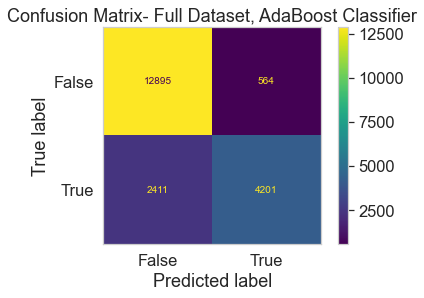

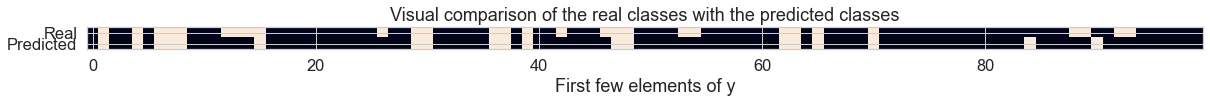

In [15]:
#Defining the classifier
clf = AdaBoostClassifier()
#Fitting the classifier to our dataset
clf.fit(X, y)
#Predicting new values based on our fitted classifier
predicted_y = clf.predict(X)

#How well does it correspond to the 'real' values?
print("Number of mislabeled points out of a total %d points : %d" % (X.shape[0], (y != predicted_y).sum())) # should have done this later

#Evaluating the performance of the model is done by evaluating the standard of prediction

from sklearn.model_selection import train_test_split

#We split the data into a training and testing part for X and y
#After a randomisation of the dataset! (random_state is used to get always the same randomisation)
#I did a randomised split because when I printed y above I realised that if I didn't randomise it would
#only be training on certain types of fruit eg apples and would be less accurate on the pther kinds 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Fit the classifier to our 'training' dataset: 'weights' of the model are going to be saved in the clf 
clf.fit(X_train, y_train)

#Predict new values based on the train dataset AND the test dataset

predicted_y_train = clf.predict(X_train)
predicted_y_test = clf.predict(X_test)

# Count the number of misclassifications in training and test sets
print("Number of mislabeled points in the training set out of a total %d points : %d" % (X_train.shape[0], (y_train != predicted_y_train).sum()))
print("Number of mislabeled points in the test set out of a total %d points : %d" % (X_test.shape[0], (y_test != predicted_y_test).sum()))

# Calculate classification accuracy
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('Score: ', train_score, test_score)

#Calculate and plot confusion matrix (see tutorial 4)
plot_confusion_matrix(clf, X_test, y_test) 
plt.grid(False)
plt.title('Confusion Matrix- Full Dataset, AdaBoost Classifier')
plt.show()

#Visualisation of Real VS Predicted classes
plt.figure(figsize=(20, 3))
plt.imshow([y_test[:100], predicted_y_test[:100]]) 
plt.xlabel('First few elements of y')
plt.yticks([0,1], ['Real', 'Predicted'])
plt.title('Visual comparison of the real classes with the predicted classes')
plt.show()
#1 color for false, another for true


#True = high air pollution
#False = low air pollution

In [16]:
#Evaluating classification scores:
predictions = clf.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.84      0.96      0.90     13459
        True       0.88      0.64      0.74      6612

    accuracy                           0.85     20071
   macro avg       0.86      0.80      0.82     20071
weighted avg       0.86      0.85      0.84     20071



In [17]:
#Cross Validated accuracy metric
CV_scores = cross_val_score(clf, X, y, cv=5)
print(np.mean(CV_scores))

0.5330805734311852


### Trying the classification again with a reduced dataset of only air pollution deaths and coal consumption:

In [18]:
reduced_data = pollution_energy_data[['Air pollution (total) (deaths per 100,000)','coal_consumption']]
reduced_data

,"Air pollution (total) (deaths per 100,000)",coal_consumption
0,66.759231,0.814
1,66.759231,0.791
2,66.759231,0.605
3,66.759231,0.640
4,66.759231,0.814
...,...,...
100347,63.822966,43844.173
100348,63.822966,43195.639
100349,63.822966,43359.508
100350,63.822966,44109.462


### Reduced Dataset - Decision Tree Classifier

In [20]:
y = np.array(reduced_data['Air pollution (total) (deaths per 100,000)'] > 60) 

#Only using coal to predict classes this time
#Predicts extremely accurately using all 4 energy types as predictors,
#so I wanted to test it 
#X = np.array(pollution_energy_data.drop(['Air pollution (total) (deaths per 100,000)'], 1).astype(float))


X = np.array(reduced_data.drop(['Air pollution (total) (deaths per 100,000)'], 1).astype(float))

C:\Users\olivi\AppData\Local\Temp/ipykernel_40888/2278780119.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(reduced_data.drop(['Air pollution (total) (deaths per 100,000)'], 1).astype(float))


Number of mislabeled points out of a total 100352 points : 9079
Number of mislabeled points in the training set out of a total 80281 points : 7210
Number of mislabeled points in the test set out of a total 20071 points : 1905
Score:  0.9101904560232185 0.9050869413581785


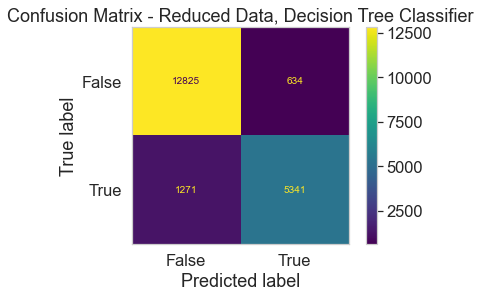

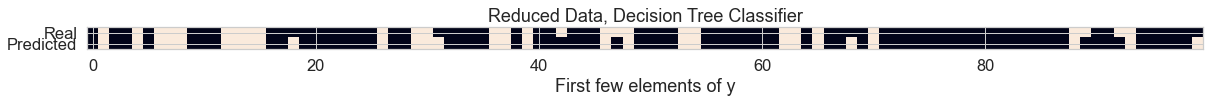

In [21]:
#Defining the classifier
clf = DecisionTreeClassifier()
#Fitting the classifier to our dataset
clf.fit(X, y)
#Predicting new values based on our fitted classifier
predicted_y = clf.predict(X)

#How well does it correspond to the 'real' values?
print("Number of mislabeled points out of a total %d points : %d" % (X.shape[0], (y != predicted_y).sum())) # should have done this later

#Evaluating the performance of the model is done by evaluating the standard of prediction

from sklearn.model_selection import train_test_split

#We split the data into a training and testing part for X and y
#After a randomisation of the dataset! (random_state is used to get always the same randomisation)
#I did a randomised split because when I printed y above I realised that if I didn't randomise it would
#only be training on certain types of fruit eg apples and would be less accurate on the pther kinds 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Fit the classifier to our 'training' dataset: 'weights' of the model are going to be saved in the clf 
clf.fit(X_train, y_train)

#Predict new values based on the train dataset AND the test dataset

predicted_y_train = clf.predict(X_train)
predicted_y_test = clf.predict(X_test)

# Count the number of misclassifications in training and test sets
print("Number of mislabeled points in the training set out of a total %d points : %d" % (X_train.shape[0], (y_train != predicted_y_train).sum()))
print("Number of mislabeled points in the test set out of a total %d points : %d" % (X_test.shape[0], (y_test != predicted_y_test).sum()))

# Calculate classification accuracy
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('Score: ', train_score, test_score)

#Calculate and plot confusion matrix (see tutorial 4)
plot_confusion_matrix(clf, X_test, y_test) 
plt.grid(False)
plt.title('Confusion Matrix - Reduced Data, Decision Tree Classifier')
plt.show()

#Visualisation of Real VS Predicted classes
plt.figure(figsize=(20, 3))
plt.imshow([y_test[:100], predicted_y_test[:100]]) 
plt.xlabel('First few elements of y')
plt.yticks([0,1], ['Real', 'Predicted'])
plt.title('Reduced Data, Decision Tree Classifier')
plt.show()
#1 color for false, another for true


#True = high air pollution
#False = low air pollution

#### Extra evaluation below:

In [22]:
#Evaluating classification scores:
predictions = clf.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.91      0.95      0.93     13459
        True       0.89      0.81      0.85      6612

    accuracy                           0.91     20071
   macro avg       0.90      0.88      0.89     20071
weighted avg       0.90      0.91      0.90     20071



Cross-validated accuracy score:

In [23]:
#Cross Validated accuracy metric
CV_scores = cross_val_score(clf, X, y, cv=5)
print(np.mean(CV_scores))

0.5640640430011079


The classifier definitely performs far worse when it is given less information/ column variables to go off of.

### Reduced Dataset - AdaBoost Classifier

As the classifier struggled here with the reduced dataset using only coal as a predictor, I think this is a good opportunity to try out what may be a more accurate predictor on it based on my comparison above. Here I have chosen the AdaBoost classifier, which appeared to be popular as an optimal classifier in the literature I reviewed for this paper (sources: ):

Number of mislabeled points out of a total 100352 points : 29763
Number of mislabeled points in the training set out of a total 80281 points : 23927
Number of mislabeled points in the test set out of a total 20071 points : 6058
Score:  0.7019593677208804 0.6981714912062179


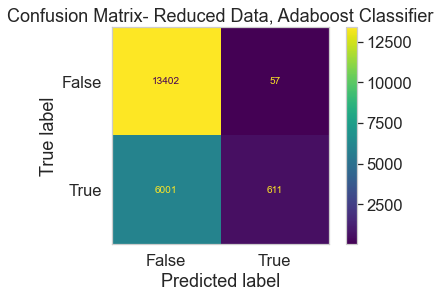

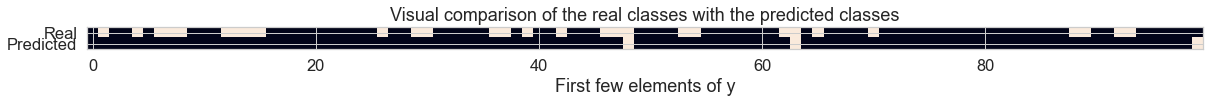

In [24]:
#Defining the classifier
clf = AdaBoostClassifier()
#Fitting the classifier to our dataset
clf.fit(X, y)
#Predicting new values based on our fitted classifier
predicted_y = clf.predict(X)

#How well does it correspond to the 'real' values?
print("Number of mislabeled points out of a total %d points : %d" % (X.shape[0], (y != predicted_y).sum())) # should have done this later

#Evaluating the performance of the model is done by evaluating the standard of prediction

from sklearn.model_selection import train_test_split

#We split the data into a training and testing part for X and y
#After a randomisation of the dataset! (random_state is used to get always the same randomisation)
#I did a randomised split because when I printed y above I realised that if I didn't randomise it would
#only be training on certain types of fruit eg apples and would be less accurate on the pther kinds 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Fit the classifier to our 'training' dataset: 'weights' of the model are going to be saved in the clf 
clf.fit(X_train, y_train)

#Predict new values based on the train dataset AND the test dataset

predicted_y_train = clf.predict(X_train)
predicted_y_test = clf.predict(X_test)

# Count the number of misclassifications in training and test sets
print("Number of mislabeled points in the training set out of a total %d points : %d" % (X_train.shape[0], (y_train != predicted_y_train).sum()))
print("Number of mislabeled points in the test set out of a total %d points : %d" % (X_test.shape[0], (y_test != predicted_y_test).sum()))

# Calculate classification accuracy
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('Score: ', train_score, test_score)

#Calculate and plot confusion matrix (see tutorial 4)
plot_confusion_matrix(clf, X_test, y_test) 
plt.grid(False)
plt.title('Confusion Matrix- Reduced Data, Adaboost Classifier')
plt.show()

#Visualisation of Real VS Predicted classes
plt.figure(figsize=(20, 3))
plt.imshow([y_test[:100], predicted_y_test[:100]]) 
plt.xlabel('First few elements of y')
plt.yticks([0,1], ['Real', 'Predicted'])
plt.title('Visual comparison of the real classes with the predicted classes')
plt.show()
#1 color for false, another for true


#True = high air pollution
#False = low air pollution

#### Evaluation metrics:

In [25]:
#Evaluating classification scores:
predictions = clf.predict(X_test)

print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

       False       0.69      1.00      0.82     13459
        True       0.91      0.09      0.17      6612

    accuracy                           0.70     20071
   macro avg       0.80      0.54      0.49     20071
weighted avg       0.76      0.70      0.60     20071



In [26]:
#Cross Validated accuracy metric
CV_scores = cross_val_score(clf, X, y, cv=5)
print(np.mean(CV_scores))

0.6486363792194909


## Regression:

#### Regression can be used to show the relationships between variables and predict a continuous y value based on an x value, as is explored below.

### Regression- Coal vs. Air Pollution Death Rates:

In [27]:
#I found my regression plot worked a lot better with a shorter dataset, so I 
#used one here that I made that uses only data from
#2012-2019:
pollution_energy_data_short = pollution_energy_data[pollution_energy_data['year'] >= 2012]

#Make it ready for regression, as a DataFrame
PollutionDeathsVSCoal =pd.DataFrame(pollution_energy_data_short, columns = ["Air pollution (total) (deaths per 100,000)", "coal_consumption"])

PollutionDeathsVSCoal

,"Air pollution (total) (deaths per 100,000)",coal_consumption
47,66.759231,3.396
48,66.759231,1.838
49,66.759231,2.082
50,66.759231,1.547
51,66.759231,0.570
...,...,...
100347,63.822966,43844.173
100348,63.822966,43195.639
100349,63.822966,43359.508
100350,63.822966,44109.462


In [28]:
#split the data into a training and testing part 
#for both the Coal consumption (as X) and the air pollution death rate (as y, our answers)
#With a randomisation of the dataset
PD_train, PD_test, Coal_train, Coal_test = train_test_split(PollutionDeathsVSCoal["Air pollution (total) (deaths per 100,000)"], PollutionDeathsVSCoal["coal_consumption"], test_size=0.2, random_state=42)




In [29]:
#Adapting to array format (not important, formatting to adapt to a different library)
PD_train_arr = PD_train.array
PD_test_arr = PD_test.array
Coal_train_arr = Coal_train.array.to_numpy().reshape(-1,1)
Coal_test_arr = Coal_test.array.to_numpy().reshape(-1,1)

Model: Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
#Again scikit-learn library to help us

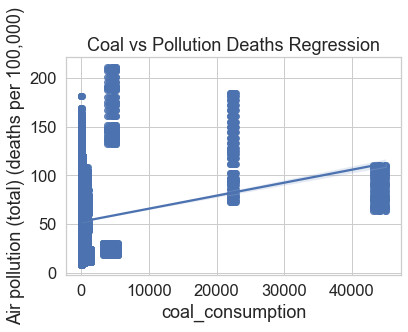

In [31]:
#Linear regression
#Again store results (weights) in the 'reg' object
reg = LinearRegression().fit(Coal_train_arr,PD_train_arr)

#Predict pollution deaths based on nuclear consumption
fitted_train_PD = reg.predict(Coal_train_arr)
fitted_test_PD = reg.predict(Coal_test_arr)

#Visualisation
# Seaborn library is used to easily visualise a dataset and its summarising models
import seaborn as sns
sns.regplot(x=PollutionDeathsVSCoal["coal_consumption"],y= PollutionDeathsVSCoal["Air pollution (total) (deaths per 100,000)"])
plt.title("Coal vs Pollution Deaths Regression")
plt.show()

Summary statistics for evaluation of the linear regression model:

In [32]:
#Source: https://www.statology.org/sklearn-linear-regression-summary/


#display regression coefficients and R-squared value of model
print(reg.intercept_, reg.coef_, reg.score(Coal_train_arr, PD_train_arr))



52.484250885060035 [0.00135109] 0.046572292982620445


The R squared value is quite low, meaning only a small amount of the variance in the response variable is explained by the model. We want it to be as close to 1 as possible. A common way that people seek to achieve this is by adding more predictors to the regression.

source: https://www.statology.org/r-vs-r-squared/

In [33]:
from sklearn.metrics import mean_squared_error 

MSE = mean_squared_error(PD_test, fitted_test_PD)
print('Mean Squared Error, testing set:', MSE)

Mean Squared Error, testing set: 1175.9831759301526


Interpreting mean squared error: https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/mean-squared-error/
MSE = "The average of a set of errors", takes how far points are from a regression line and squares the value

The lower the mean squared error, the better, so this MSE value is really poor and means the model does not predict very well, making lots of errors. 

#### Cross validation of model:

In [14]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
MSEs = cross_val_score(reg, PollutionDeathsVSCoal["coal_consumption"].array.to_numpy().reshape(-1,1), PollutionDeathsVSCoal["coal_consumption"], "Air pollution (total) (deaths per 100,000)" scoring = 'neg_mean_squared_error', cv=cv)
print(abs(MSEs))
print('MSE: ', np.mean(abs(MSEs)), ' +/- ' , np.std(abs(MSEs)))
#[We take the absolute value to simplify visualisation, as all values are negative, due to sklearn internal settings]

SyntaxError: invalid syntax (Temp/ipykernel_23936/2722414140.py, line 2)

### Regression- Nuclear vs. Air Pollution Death Rates:

In [34]:
#Make it ready for regression, as a DataFrame
PollutionDeathsVSNuclear =pd.DataFrame(pollution_energy_data_short, columns = ["Air pollution (total) (deaths per 100,000)", "nuclear_consumption"])

PollutionDeathsVSNuclear

,"Air pollution (total) (deaths per 100,000)",nuclear_consumption
47,66.759231,0.000
48,66.759231,0.000
49,66.759231,0.000
50,66.759231,0.000
51,66.759231,0.000
...,...,...
100347,63.822966,6516.074
100348,63.822966,6575.951
100349,63.822966,6596.391
100350,63.822966,6711.461


In [35]:
#randomised split of data
PD_train, PD_test, Nuclear_train, Nuclear_test = train_test_split(PollutionDeathsVSNuclear["Air pollution (total) (deaths per 100,000)"], PollutionDeathsVSNuclear["nuclear_consumption"], test_size=0.2, random_state=42)


In [36]:
# changing format to array:

PD_train_arr = PD_train.array
PD_test_arr = PD_test.array
Nuclear_train_arr = Nuclear_train.array.to_numpy().reshape(-1,1)
Nuclear_test_arr = Nuclear_test.array.to_numpy().reshape(-1,1)

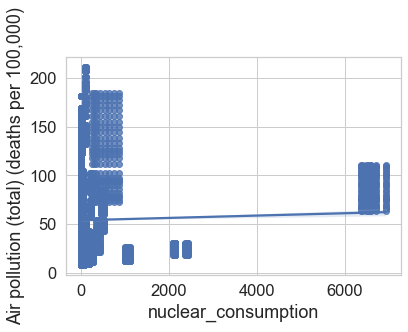

C:\Users\olivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


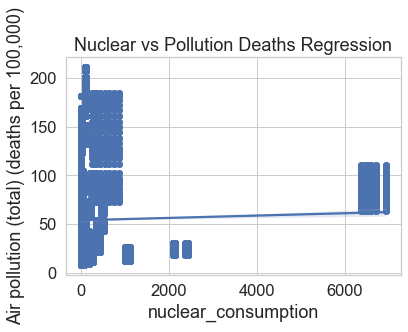

In [37]:
#Linear regression
#Again store results (weights) in the 'reg' object
reg = LinearRegression().fit(Nuclear_train_arr,PD_train_arr)

#Predict pollution deaths based on nuclear consumption
fitted_train_PD = reg.predict(Nuclear_train_arr)
fitted_test_PD = reg.predict(Nuclear_test_arr)

#Visualisation
# Seaborn library is used to easily visualise a dataset and its summarising models
import seaborn as sns
sns.regplot(x=PollutionDeathsVSNuclear["nuclear_consumption"],y= PollutionDeathsVSNuclear["Air pollution (total) (deaths per 100,000)"])

plt.show()

nuclear = PollutionDeathsVSNuclear["nuclear_consumption"]
deaths = PollutionDeathsVSNuclear["Air pollution (total) (deaths per 100,000)"]
plt.scatter(nuclear,deaths)
plt.title("Nuclear vs Pollution Deaths Regression")
sns.regplot(nuclear, deaths)
plt.show()

#very very weak relationship, can see coal had more of a relationship

In [20]:
#Source: https://www.statology.org/sklearn-linear-regression-summary/


#display regression coefficients and R-squared value of model
print(reg.intercept_, reg.coef_, reg.score(Nuclear_train_arr, PD_train_arr))


52.484250885060035 [0.00135109] -0.001045890938329741


In [15]:
MSE = mean_squared_error(PD_test, fitted_test_PD)
print('Mean Squared Error, testing set:', MSE)

Mean Squared Error, testing set: 1175.9831759301526


From the R squared value I think that this regression model is quite poor and does not explain any of the variance in the data. 

In a more in-depth study I would now look for other predictors to explain more of the variance in the outcome variable i.e. deaths from air pollution.

The mean squared error is poor because it is a very high value.

#### Looking at Correlation scores between variables:

I've noticed these correspond to the regression coefficient above.

In [42]:
#find correlation:
#pollution_energy_data['column'].groupby().[pollution_energy_data["coal_consumption"],pollution_energy_data["Air pollution (total) (deaths per 100,000)"].corr()
 
    
#Checking correlation between coal and air pollution deaths
    
pollution_energy_data["Air pollution (total) (deaths per 100,000)"].corr(pollution_energy_data["coal_consumption"])                                           
                                           
 #positive correlation, but not super high
#highest correlation out of all the variables, however

0.15631059464176836

In [43]:
#Checking correlation between nuclear and air pollution deaths
    
pollution_energy_data["Air pollution (total) (deaths per 100,000)"].corr(pollution_energy_data["nuclear_consumption"]) 

#much lower correlation than coal, in keeping with my research question,
#lowest correlation overall, which is very interesting

0.013133048709578706

In [44]:
#Checking correlation between renewables and air pollution deaths
    
pollution_energy_data["Air pollution (total) (deaths per 100,000)"].corr(pollution_energy_data["renewables_consumption"]) 


#higher correlation than nuclear which is interesting, shows nuclear to be greener, but lower than coal

0.0734472106626458

In [45]:
#Checking correlation between oil and air pollution deaths
    
pollution_energy_data["Air pollution (total) (deaths per 100,000)"].corr(pollution_energy_data["oil_consumption"]) 

#lower correlation than both coal and renewables, but higher than nuclear

0.0649696865846231

In [46]:
#Checking correlation between nuclear and coal- are people swapping out one for the other?
    
pollution_energy_data["coal_consumption"].corr(pollution_energy_data["nuclear_consumption"]) 

#High correlation- what does this mean?

0.8519087026676292

## Time Series Regression:

Here I am trying a multivariate variation on ARIMA called a VARMA model to predict future values for each of the variables in my dataset.

In [32]:
#online resource used:
#https://blogs.sap.com/2021/05/06/a-multivariate-time-series-modeling-and-forecasting-guide-with-python-machine-learning-client-for-sap-hana/


#This online resource is actually slightly better:

#https://www.analyticsvidhya.com/blog/2021/08/vector-autoregressive-model-in-python/

#and this one from the same website:

#https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/

#I ended up using a combination of the three above sources to construct this attempt

In [ ]:
#changing year to datetime
pollution_energy_data['year'] = pd.to_datetime(pollution_energy_data['year'] , format = '%d/%m/%Y %H.%M.%S')
data = pollution_energy_data.drop(['year'], axis=1)
data.index = pollution_energy_data['year']

In [51]:
#Checking for stationarity with ADF test
#(The data needs to be made stationary for the model to work)
#Null hypothesis = data is stationary

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")
        
        
#Checking each of the variables for stationarity:

adf_test(pollution_energy_data['coal_consumption'])





Augmented Dickey-Fuller Test: 
ADF test statistic          -1.737105
p-value                      0.412103
# lags used                 68.000000
# observations          100283.000000
critical value (1%)         -3.430415
critical value (5%)         -2.861569
critical value (10%)        -2.566785
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [54]:
#pollution_energy_data = pollution_energy_data.drop(['country'], axis = 1)
#already deleted this earlier

In [53]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, sig=0.05, name=''):
    res = adfuller(series, autolag='AIC')    
    p_value = round(res[1], 3) 

    if p_value <= sig:
        print(f" {name} : P-Value = {p_value} => Stationary. ")
    else:
        print(f" {name} : P-Value = {p_value} => Non-stationary.")

for name, column in pollution_energy_data.iteritems():
    adfuller_test(column, name=column.name)

 Unnamed: 0 : P-Value = 0.587 => Non-stationary.
 Air pollution (total) (deaths per 100,000) : P-Value = 0.0 => Stationary. 
 year : P-Value = 0.0 => Stationary. 
 renewables_consumption : P-Value = 0.341 => Non-stationary.
 oil_consumption : P-Value = 0.252 => Non-stationary.
 nuclear_consumption : P-Value = 0.455 => Non-stationary.
 coal_consumption : P-Value = 0.412 => Non-stationary.


In [55]:
#Clearly need to make all the energy source variables stationary
#Can do this via differencing

data_differenced = pollution_energy_data.diff().dropna()
for name, column in data_differenced.iteritems():
    adfuller_test(column, name=column.name)

#Now when I do this everyhting is stationary 
#Don't even need to do second differencing

 Unnamed: 0 : P-Value = 0.0 => Stationary. 
 Air pollution (total) (deaths per 100,000) : P-Value = 0.0 => Stationary. 
 year : P-Value = 0.0 => Stationary. 
 renewables_consumption : P-Value = 0.0 => Stationary. 
 oil_consumption : P-Value = 0.0 => Stationary. 
 nuclear_consumption : P-Value = 0.0 => Stationary. 
 coal_consumption : P-Value = 0.0 => Stationary. 


In [56]:
#Need to do a train/test split
#creating the train and validation set

test_obs = int(0.8*(len(data_differenced)))
train = data_differenced[:int(0.8*(len(data_differenced)))]
test = data_differenced[int(0.8*(len(data_differenced))):]

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(test))


C:\Users\olivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\olivi\anaconda3\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [58]:
#Grid search for order P:

for i in [1,2,3,4,5,6,7,8,9,10]:
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

C:\Users\olivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Order = 1
AIC:  50.93453319939642
BIC:  50.941015875406336

Order = 2
AIC:  50.892411063467144
BIC:  50.904566216104584



C:\Users\olivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Order = 3
AIC:  50.86165246167307
BIC:  50.8794802170536



C:\Users\olivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\olivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Order = 4
AIC:  50.81829505987289
BIC:  50.84179554411649



C:\Users\olivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Order = 5
AIC:  50.78975740615862
BIC:  50.81893074538973



C:\Users\olivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Order = 6
AIC:  50.74796752426089
BIC:  50.782813844608356



C:\Users\olivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Order = 7
AIC:  50.717582090576855
BIC:  50.75810151817395



C:\Users\olivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Order = 8
AIC:  50.65704291792158
BIC:  50.70323557890602



C:\Users\olivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Order = 9
AIC:  50.60248682215585
BIC:  50.65435284266978



C:\Users\olivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Order = 10
AIC:  50.576331304643475
BIC:  50.63387081083345



In [46]:
#Order 5 returns lowest AIC score before it starts increasing again
#Apparently according to this webpage:
#https://www.analyticsvidhya.com/blog/2021/08/vector-autoregressive-model-in-python/

#...AIC "punishes model" when too complex,
#so need to keep this score low and find optimal value

In [59]:
result = model.fit(5)
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 13, May, 2022
Time:                     04:03:20
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                    50.8189
Nobs:                     80275.0    HQIC:                   50.7987
Log likelihood:      -2.83566e+06    FPE:                1.14212e+22
AIC:                      50.7898    Det(Omega_mle):     1.13854e+22
--------------------------------------------------------------------
Results for equation Unnamed: 0
                                                   coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------------------------
const                                                 4.117579         0.427122            9.640           0.000
L1.Unnamed: 0                           

In [60]:
lagged_Values = train.values[-8:]

pred = result.forecast(y=lagged_Values, steps=12) 

idx = pd.date_range('1980', periods=12, freq='YS')
df_forecast=pd.DataFrame(data=pred, index=idx, columns=[ 'year','Air pollution (total) (deaths per 100,000)', 'coal_consumption', 'oil_consumption','renewables_consumption', 'nuclear_consumption', 'Unnamed'])

In [61]:
#Need to invert the transformations
#Source: https://www.analyticsvidhya.com/blog/2021/08/vector-autoregressive-model-in-python/
#This is because I differenced earlier and differencing is a transformation

#For pollution deaths
df_forecast['Air pollution (total) (deaths per 100,000)_1d'] = (pollution_energy_data['Air pollution (total) (deaths per 100,000)'].iloc[-test_obs-1]-pollution_energy_data['Air pollution (total) (deaths per 100,000)'].iloc[-test_obs-2]) + df_forecast['Air pollution (total) (deaths per 100,000)'].cumsum()
df_forecast['Pollution_Deaths_Forecast'] = pollution_energy_data['Air pollution (total) (deaths per 100,000)'].iloc[-test_obs-1] + df_forecast['Air pollution (total) (deaths per 100,000)_1d'].cumsum()


#For coal consumption
df_forecast['coal_consumption_1d'] = (pollution_energy_data['coal_consumption'].iloc[-test_obs-1]-pollution_energy_data['coal_consumption'].iloc[-test_obs-2]) + df_forecast['coal_consumption'].cumsum()
df_forecast['coal_forecast'] = pollution_energy_data['coal_consumption'].iloc[-test_obs-1] + df_forecast['coal_consumption_1d'].cumsum()


#For oil consumption
df_forecast['oil_consumption_1d'] = (pollution_energy_data['oil_consumption'].iloc[-test_obs-1]-pollution_energy_data['oil_consumption'].iloc[-test_obs-2]) + df_forecast['oil_consumption'].cumsum()
df_forecast['oil_forecast'] = pollution_energy_data['oil_consumption'].iloc[-test_obs-1] + df_forecast['oil_consumption_1d'].cumsum()


#For renewables consumption
df_forecast['renewables_consumption_1d'] = (pollution_energy_data['renewables_consumption'].iloc[-test_obs-1]-pollution_energy_data['renewables_consumption'].iloc[-test_obs-2]) + df_forecast['coal_consumption'].cumsum()
df_forecast['renewables_forecast'] = pollution_energy_data['renewables_consumption'].iloc[-test_obs-1] + df_forecast['renewables_consumption_1d'].cumsum()


#For nuclear Consumption

df_forecast['nuclear_consumption_1d'] = (pollution_energy_data['nuclear_consumption'].iloc[-test_obs-1]-pollution_energy_data['nuclear_consumption'].iloc[-test_obs-2]) + df_forecast['coal_consumption'].cumsum()
df_forecast['nuclear_forecast'] = pollution_energy_data['nuclear_consumption'].iloc[-test_obs-1] + df_forecast['nuclear_consumption_1d'].cumsum()







<AxesSubplot:>

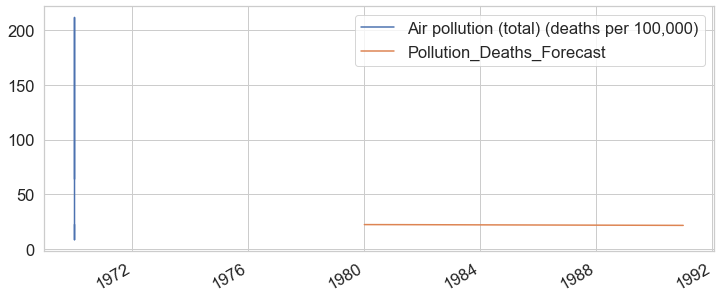

In [62]:
#Plotting the results of all of this:

test_original = pollution_energy_data[-test_obs:]
test_original.index = pd.to_datetime(test_original.index)

#air pollution deaths

test_original['Air pollution (total) (deaths per 100,000)'].plot(figsize=(12,5),legend=True)
df_forecast['Pollution_Deaths_Forecast'].plot(legend=True)


<AxesSubplot:>

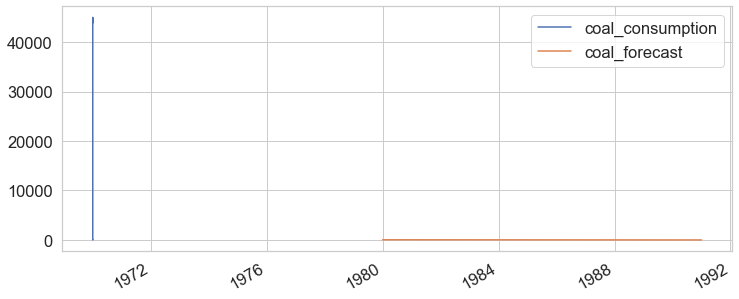

In [55]:
#Plotting the resutls of all of this:

test_original = pollution_energy_data[-test_obs:]
test_original.index = pd.to_datetime(test_original.index)

#air pollution deaths

test_original['coal_consumption'].plot(figsize=(12,5),legend=True)
df_forecast['coal_forecast'].plot(legend=True)


In [65]:
#These plots aren't working very well so I'm going to try 
#Looking at the predictions produced by the other method on this page:

#Training and testing sets already created earlier


cols = pollution_energy_data.columns
#for j in cols:
    #for i in range(0,len(pollution_energy_data)):
      # if pollution_energy_data[j][i] == -200:
          # pollution_energy_data[j][i] = pollution_energy_data[j][i-1]
            
            
#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(test))

#converting predictions to dataframe
pred = pd.DataFrame(index=range(0,len(prediction)),columns= [cols])
for j in range(0,13):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], valid[i])))
    
    #printing predictions
    print(pred)

C:\Users\olivi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


IndexError: index 7 is out of bounds for axis 0 with size 7

In [64]:
#make final predictions
model = VAR(endog=pollution_energy_data)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)
#I think the values printed below are regression coefficients

[[4.01853740e+05 6.34662442e+01 2.00409989e+03 1.62973855e+04
  4.78273442e+04 5.68533435e+03 3.84271446e+04]]


In [ ]:
#Equation of VAR model: